In [1]:
import ebisim as eb
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
# os.environ["NUMBA_DISABLE_INTEL_SVML"] = "1"
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 100
# eb.simulation._advanced.compile_adv_model()

print(os.environ.get("NUMBA_DISABLE_INTEL_SVML", "Not set"))

Not set


In [2]:

k = eb.Target.get_ions("K", 1e-8 * 1.5e15, kT=80)
ne = eb.Target.get_gas("Ne", 2e-11, 5e-3)

# k = eb.Target.get_ions("K", .1*1e-8 * 1.5e15, kT_per_q=80)
# ne = eb.Target.get_gas("Ne", 10*.1e-11, 5e-3)


# k = eb.Target.get_gas("Ar", .5e-10, 1e-4)
dev = eb.Device.get(current=1, e_kin=8000, r_e=1e-4, length=0.8, v_ax=1300, b_ax=2, r_dt=0.005, n_grid=400,)
print(ne.n)
print(k.n)
# res = eb.advanced_simulation(dev, k,60, rates=True)



[3.79241049e+07 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06]
[1.0e-06 1.5e+07 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06
 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06
 1.0e-06 1.0e-06]


In [3]:
TMAX = 180
# T0 = 0.0001
kr, nr = eb.advanced_simulation(
    dev, [k, ne],TMAX,
    options=eb.ModelOptions(RADIAL_DYNAMICS=True,),
    solver_kwargs={"method":"Radau", "dense_output":True, "max_step":10},# "atol":1e-8},
    rates=True,
    n_threads=4
)
# kr= eb.advanced_simulation(
#     dev, [k, ],TMAX,
#     options=eb.ModelOptions(RADIAL_DYNAMICS=True),
#     solver_kwargs={"method":"Radau","dense_output":True, "max_step":.01, "min_step":1e-8},
#     rates=True,
# )


Initial temperature vector adjusted for Element: Potassium (K, Z = 19, A = 39). This only affects charge states with densities at the minimum limit.
Initial temperature vector adjusted for Element: Neon (Ne, Z = 10, A = 20). This only affects charge states with densities at the minimum limit.



Integration finished: 9934 calls                    
The solver successfully reached the end of the integration interval.
Calls: 9934 of which ~2862 normal (28.81%) and ~7068 for jacobian approximation (71.15%)
Rates finished: 302 rates


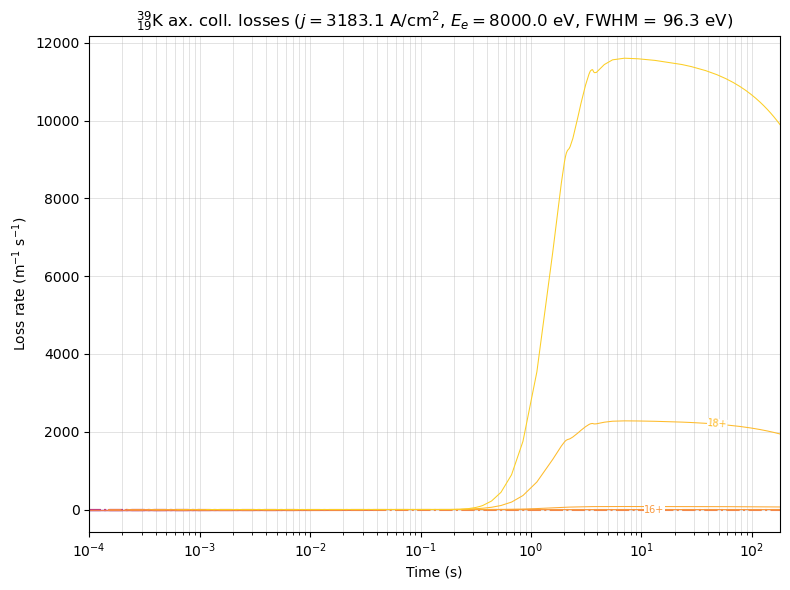

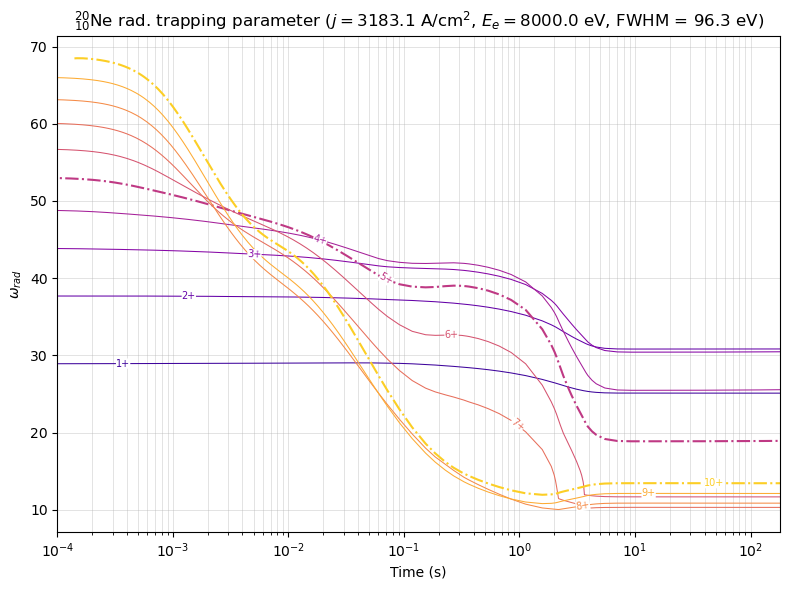

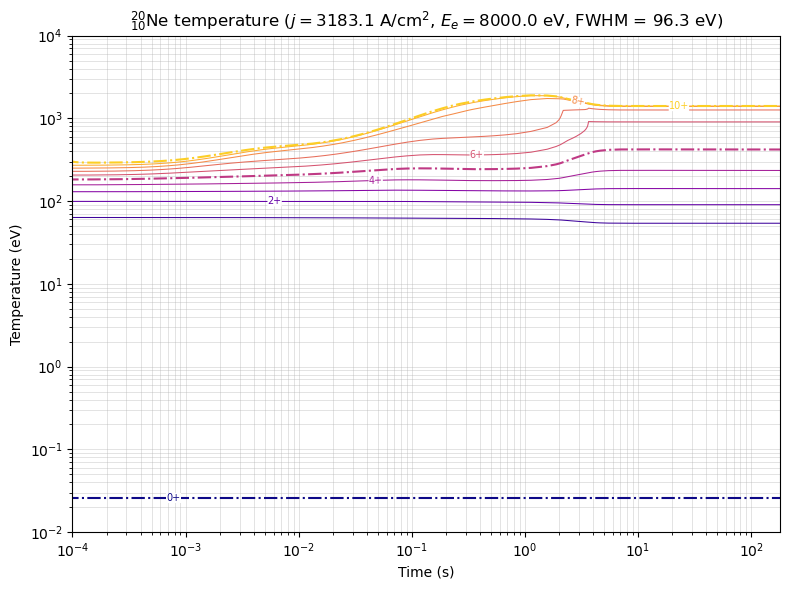

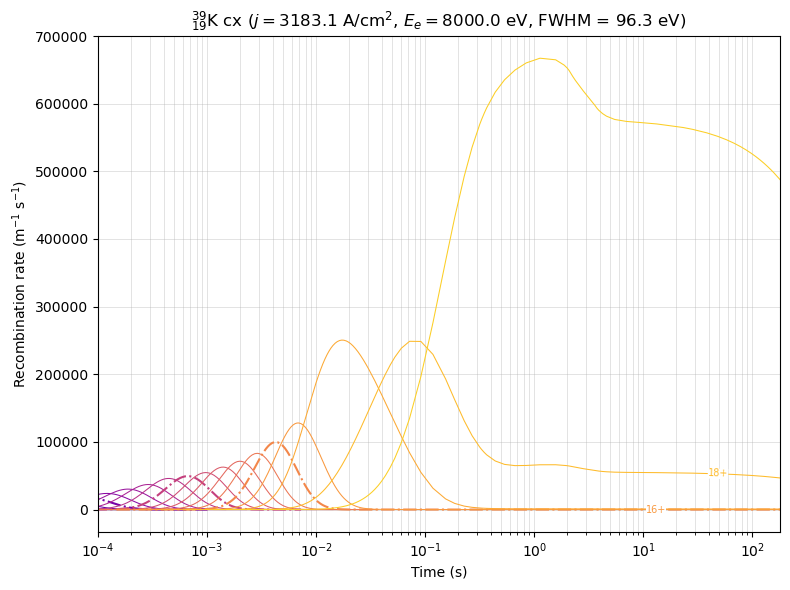

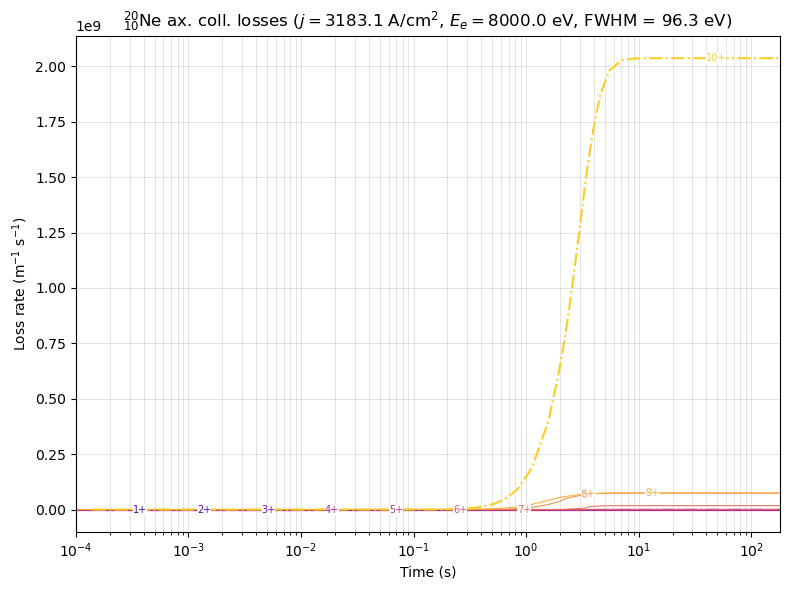

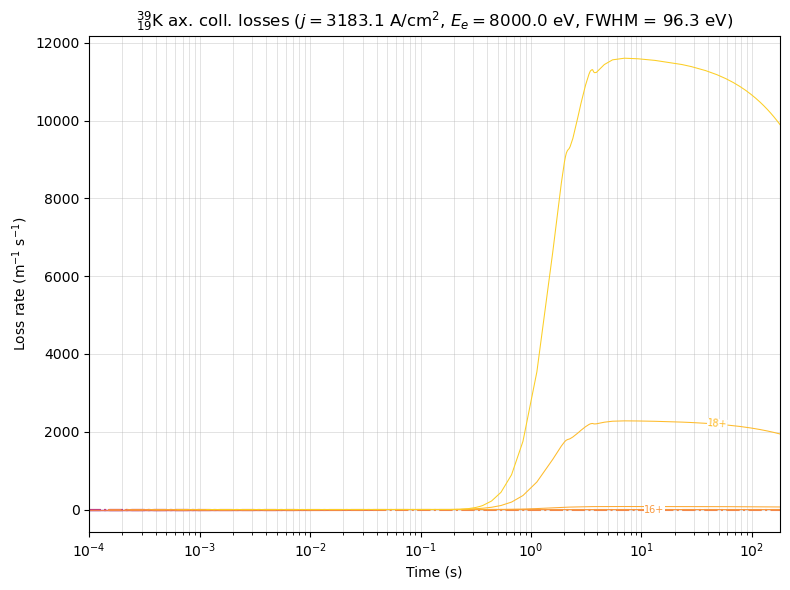

In [4]:
# nr.plot_rate(eb.Rate.KT_MIN, xlim=(1e-8,10))
# nr.plot_rate(eb.Rate.IONISATION_HEAT, xlim=(1e-8,10))
nr.plot_rate(eb.Rate.W_RA)#, xlim=(1e-8,10))

_=nr.plot_temperature(dens_threshold=0)
kr.plot_rate(eb.Rate.CX)#, xlim=(1e-8,10))
nr.plot_rate(eb.Rate.LOSSES_AXIAL_COLLISIONAL)
kr.plot_rate(eb.Rate.LOSSES_AXIAL_COLLISIONAL)


# nr.plot_rate(eb.Rate.AX_RT)
# nr.plot_rate(eb.Rate.AX_CO)
# kr.plot_rate(eb.Rate.AX_RT)
# _=kr.plot_rate(eb.Rate.AX_CO)

/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:488: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)
/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:488: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


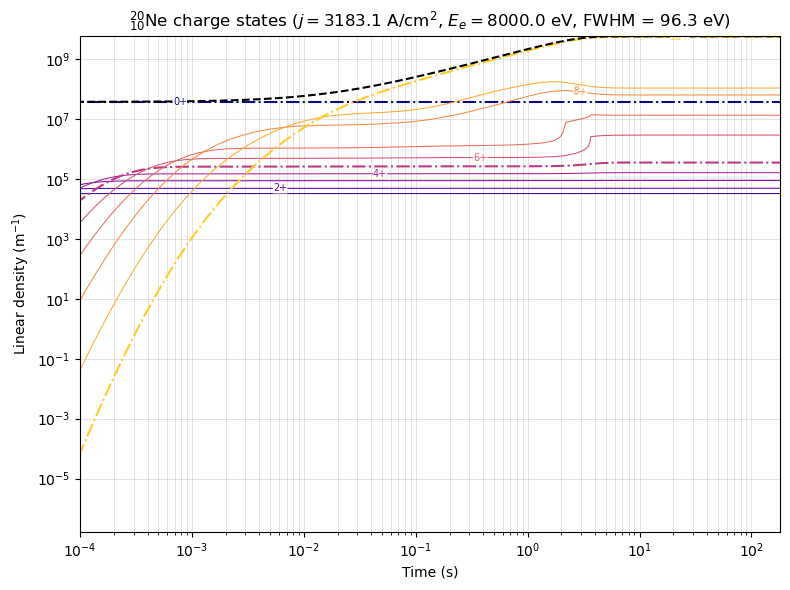

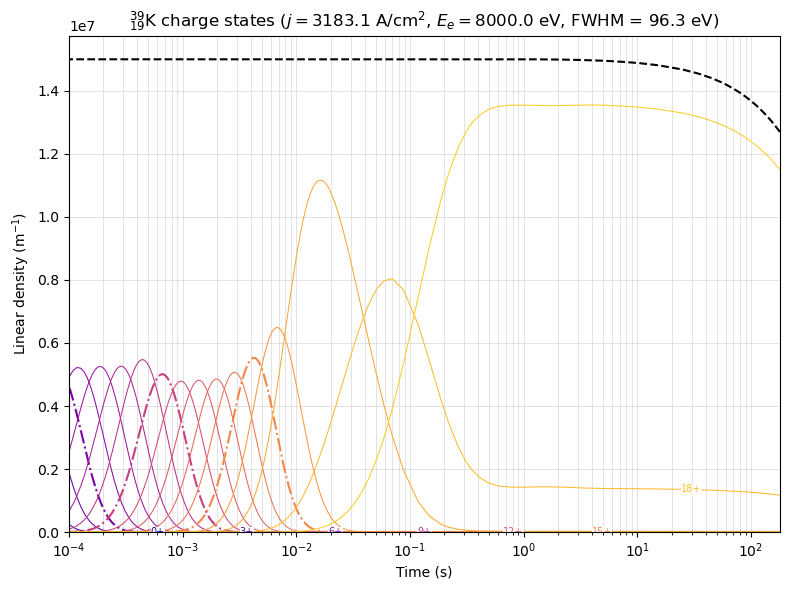

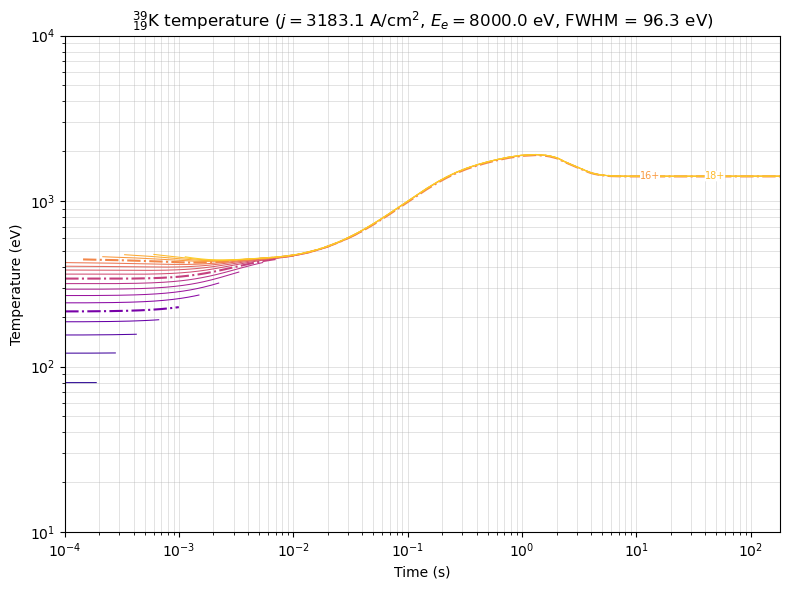

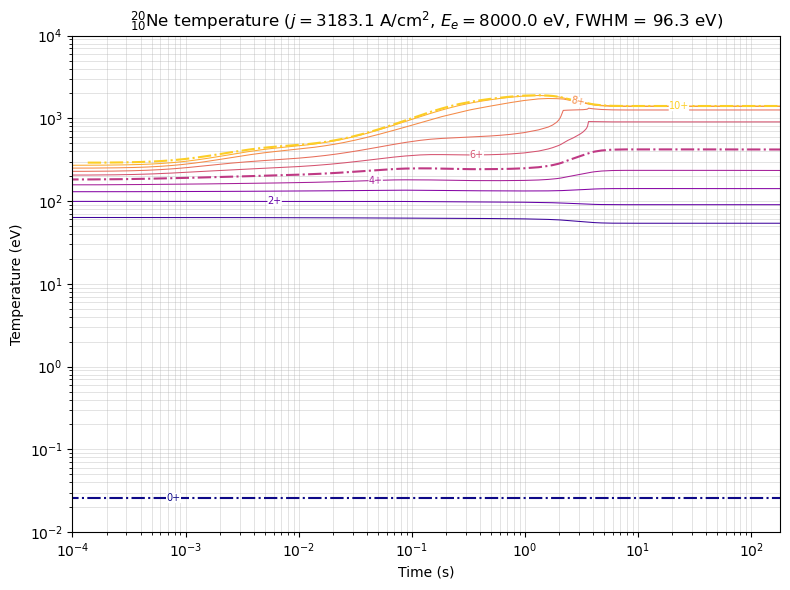

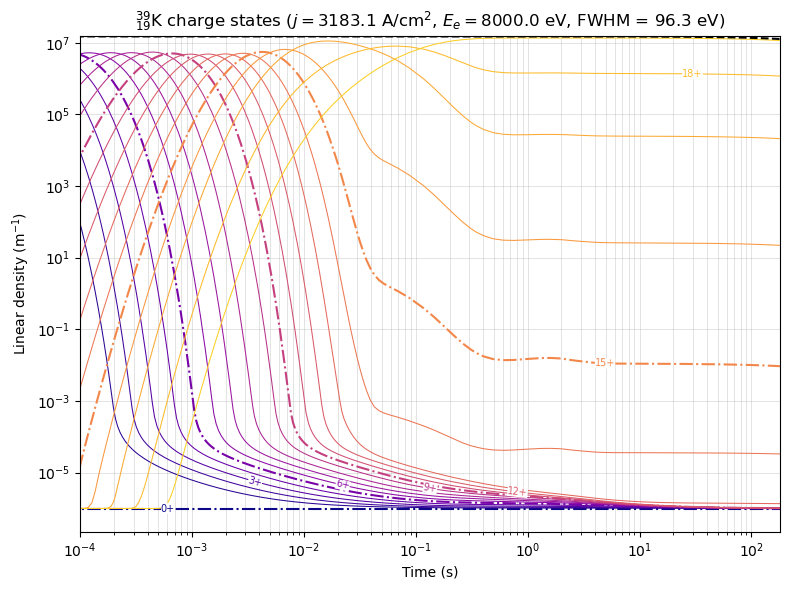

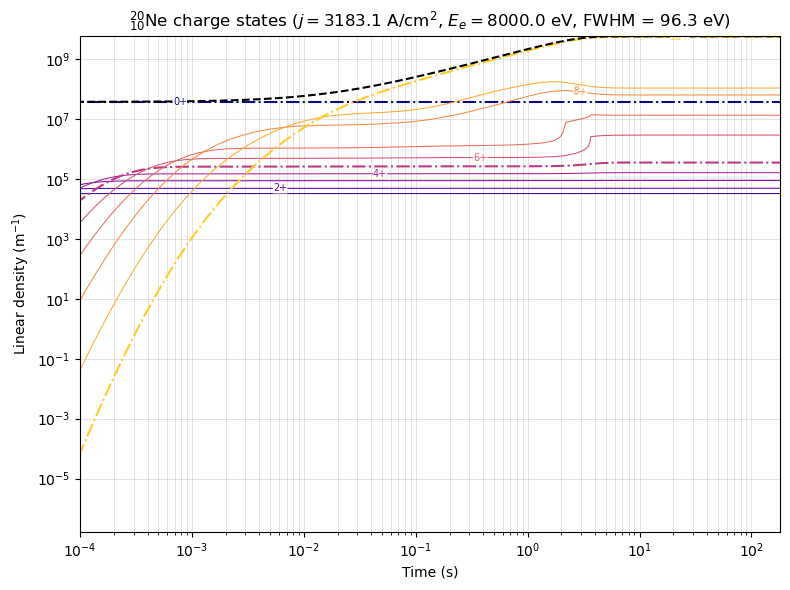

In [5]:
kr.plot_charge_states()
# kr.plot_energy_density()
# _=kr.plot_temperature(dens_threshold=-3)
_=kr.plot_temperature()
_=nr.plot_temperature()
kr.plot_charge_states(yscale="log")
nr.plot_charge_states(yscale="log")


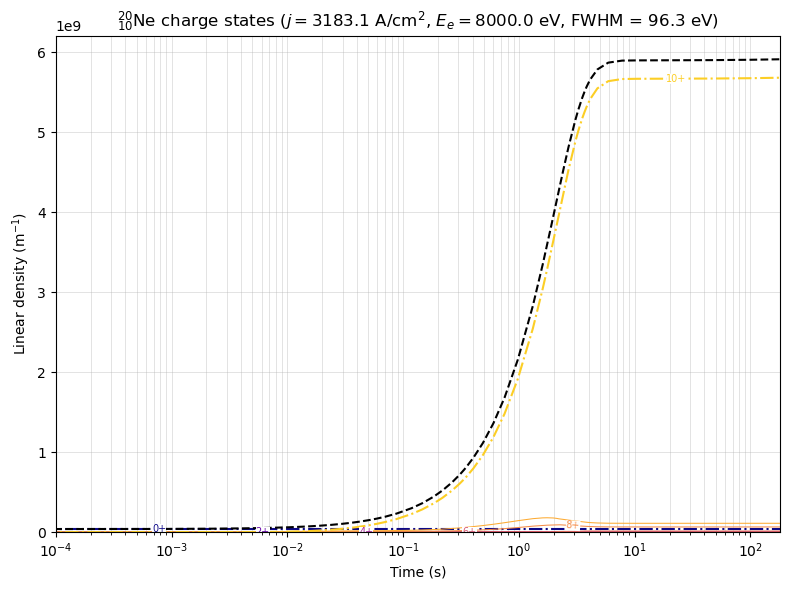

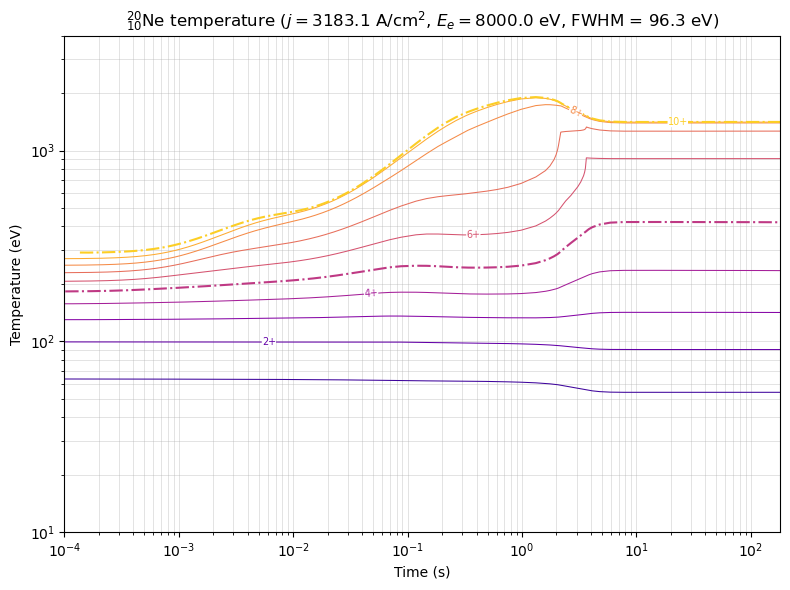

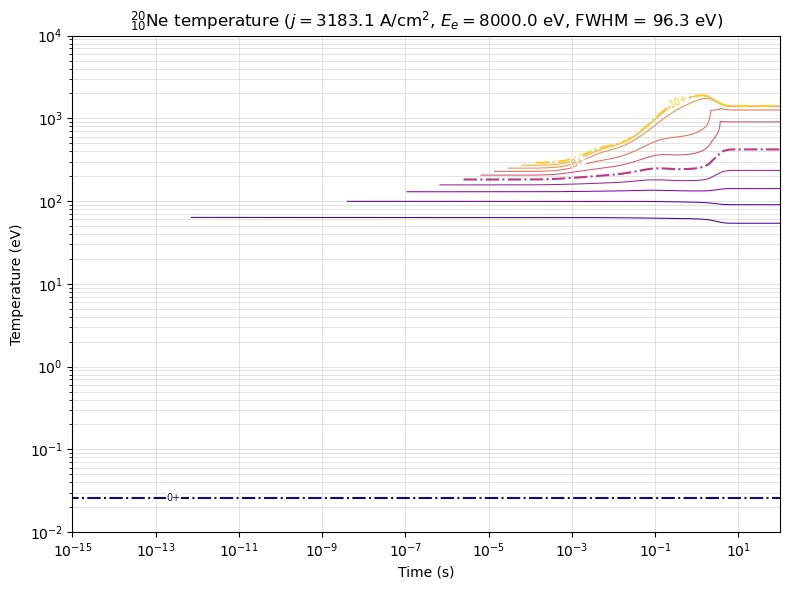

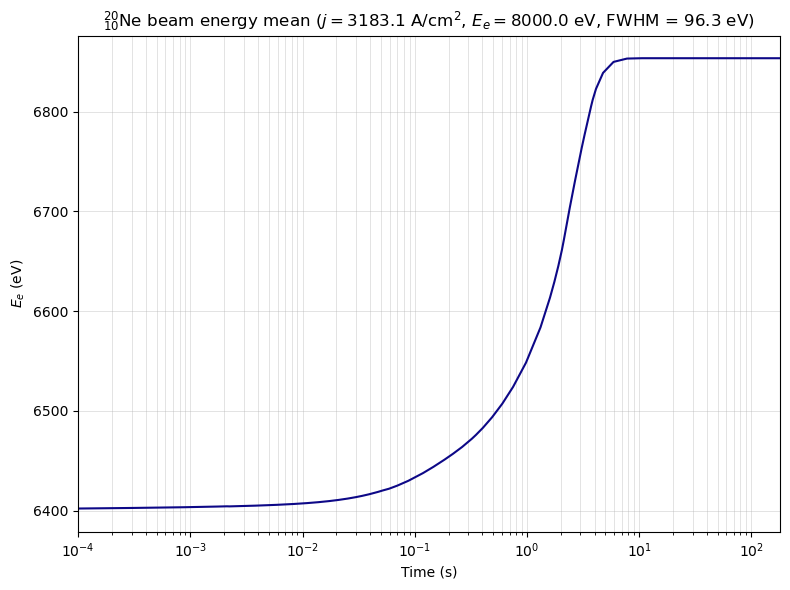

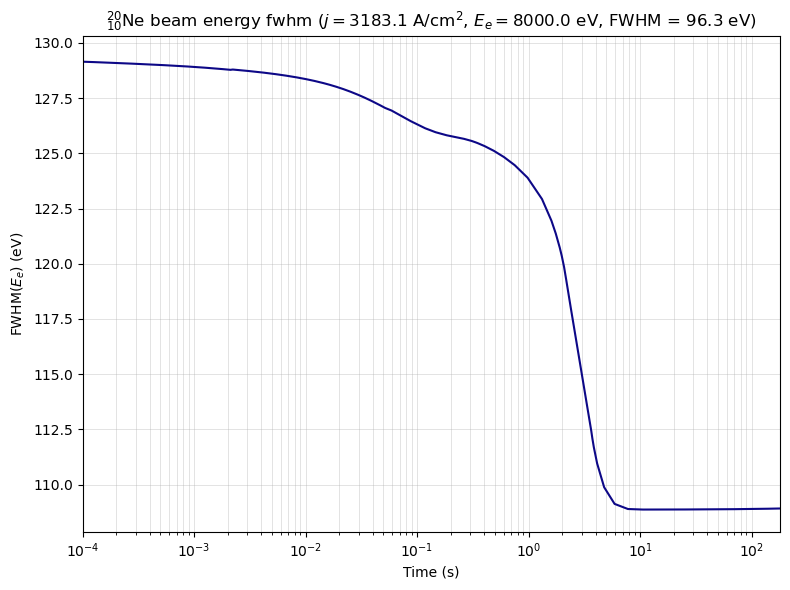

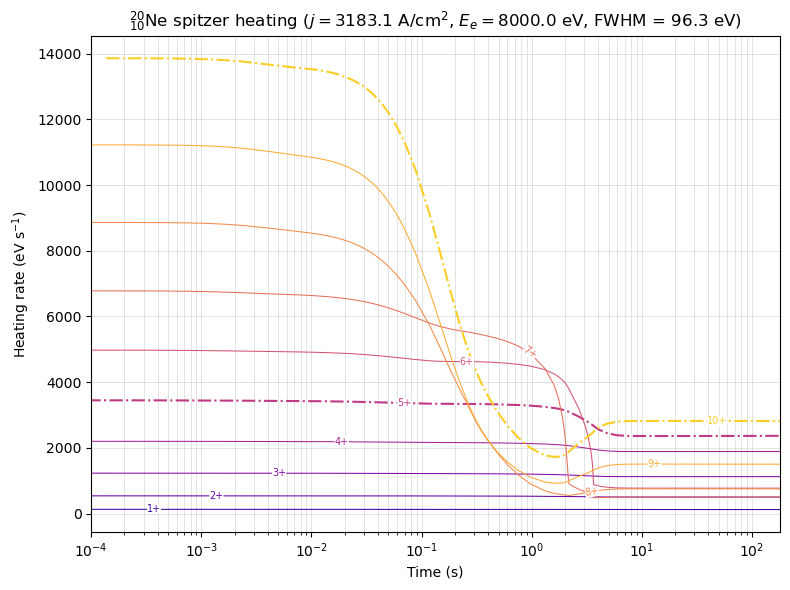

In [6]:
nr.plot_charge_states()
# nr.plot_energy_density()
_=nr.plot_temperature(ylim=(10, 4000))
_=nr.plot_temperature(xlim=(1e-15, 100), xscale="log")#, dens_threshold=0)
nr.plot_rate(eb.Rate.E_KIN_MEAN)
nr.plot_rate(eb.Rate.E_KIN_FWHM)
_=nr.plot_rate(eb.Rate.SPITZER_HEATING)

In [10]:
# nr.plot_rate(eb.Rate.RA_RT)
# nr.plot_rate(eb.Rate.RA_CO)
# kr.plot_rate(eb.Rate.RA_RT)
# _=kr.plot_rate(eb.Rate.RA_CO)

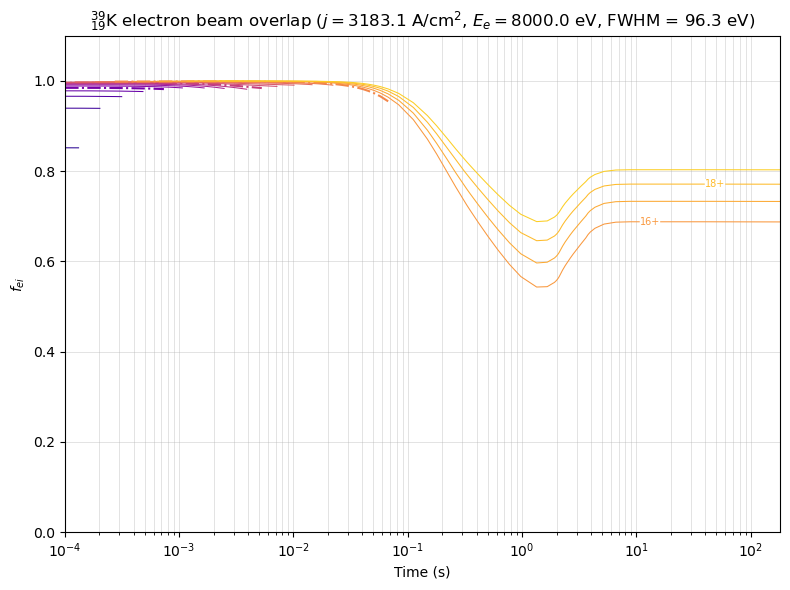

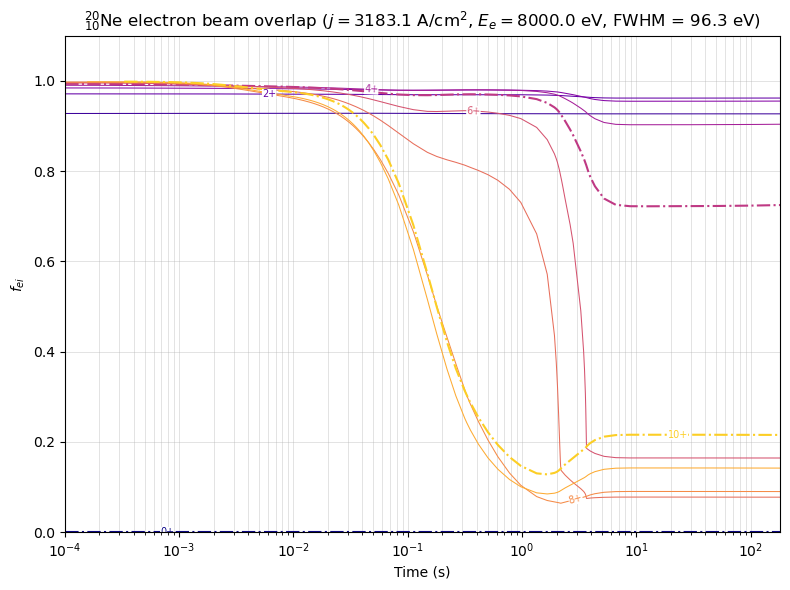

In [11]:
_=kr.plot_rate(eb.Rate.F_EI)
_=nr.plot_rate(eb.Rate.F_EI)

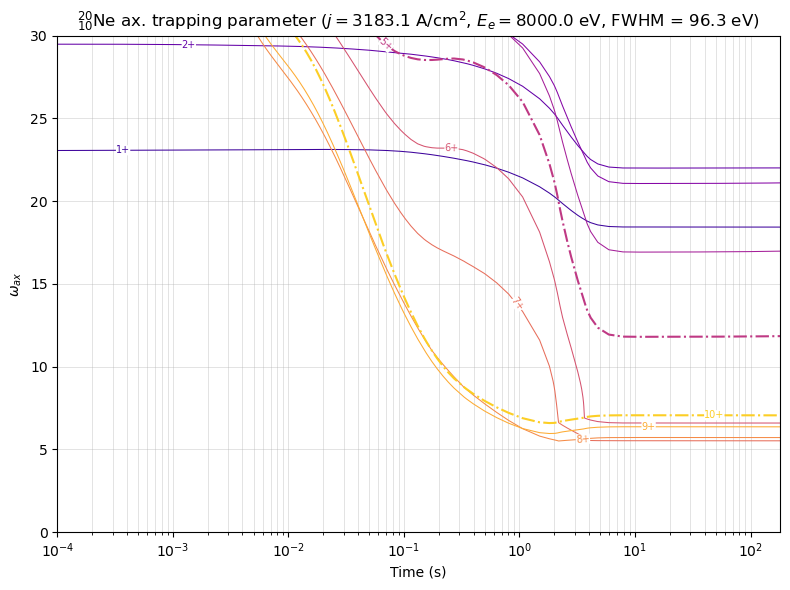

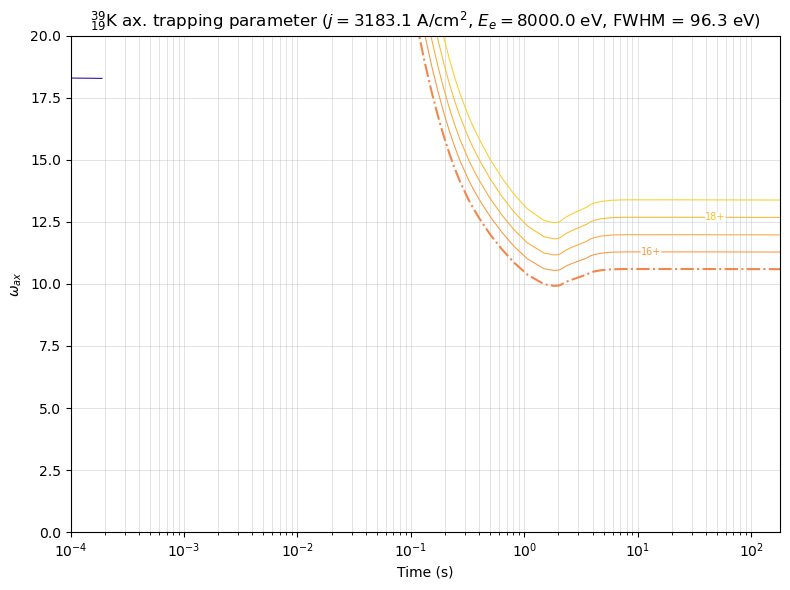

In [9]:
nr.plot_rate(eb.Rate.TRAPPING_PARAMETER_AXIAL, yscale="linear", ylim=(0,30));
kr.plot_rate(eb.Rate.TRAPPING_PARAMETER_AXIAL, yscale="linear", ylim=(0,20));

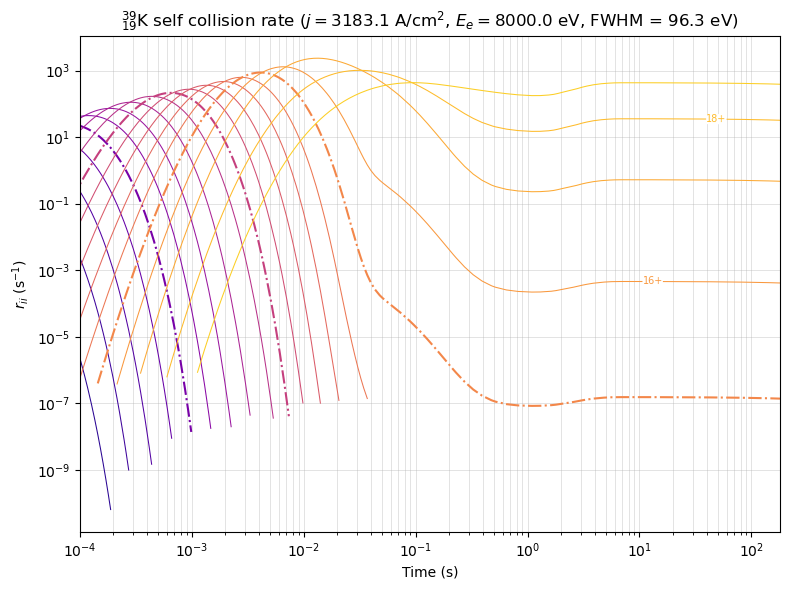

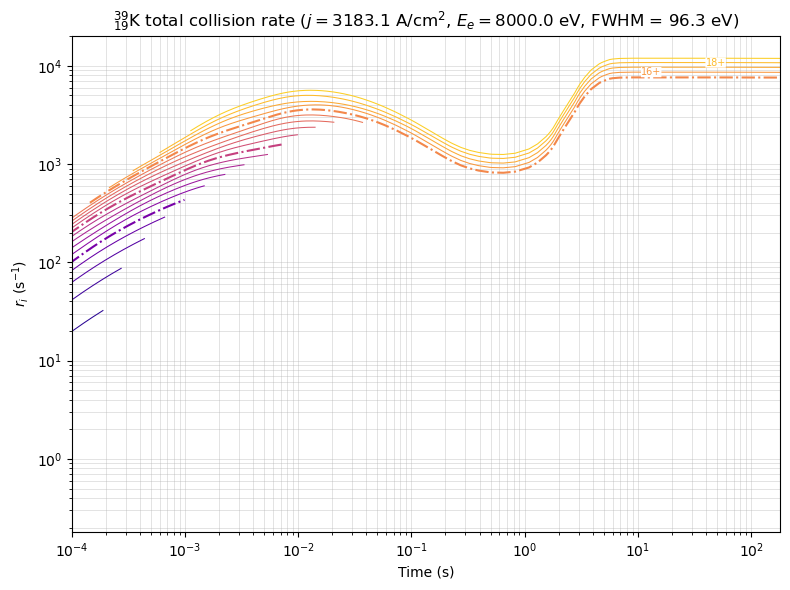

In [10]:
kr.plot_rate(eb.Rate.COLLISION_RATE_SELF, yscale="log")
_ = kr.plot_rate(eb.Rate.COLLISION_RATE_TOTAL, yscale="log")

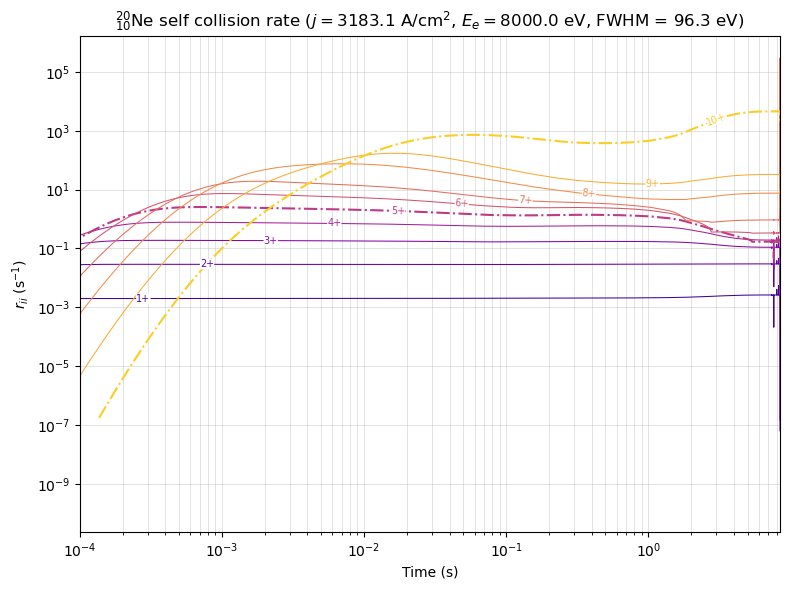

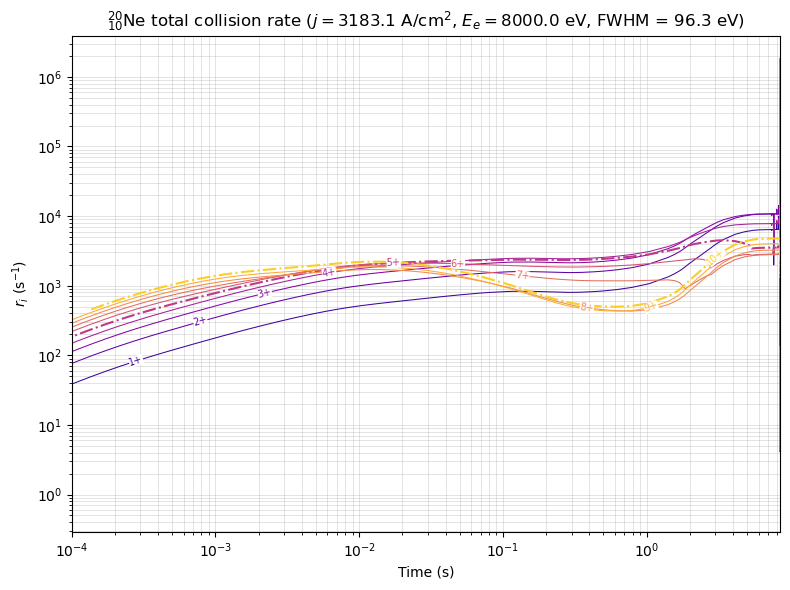

In [11]:
nr.plot_rate(eb.Rate.COLLISION_RATE_SELF, yscale="log")
_ = nr.plot_rate(eb.Rate.COLLISION_RATE_TOTAL, yscale="log")

/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:488: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


ValueError: Value for t lies outside the simulated domain.

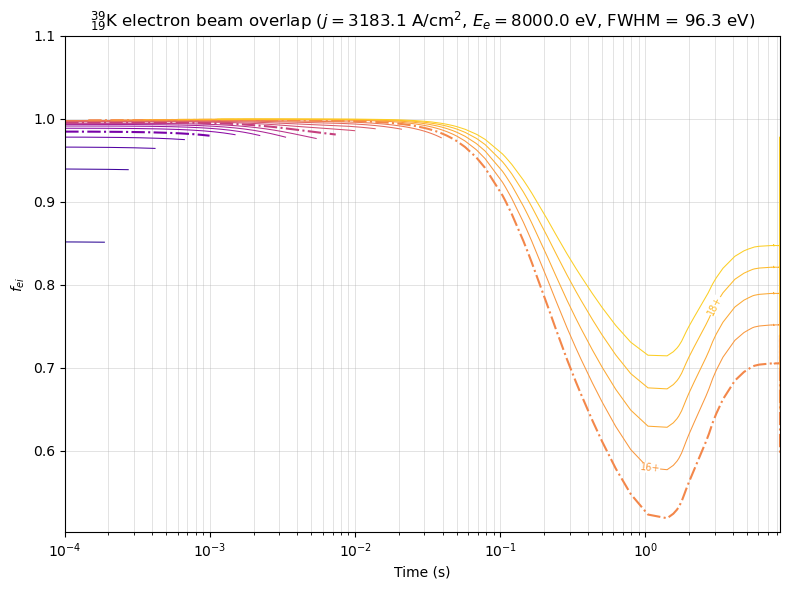

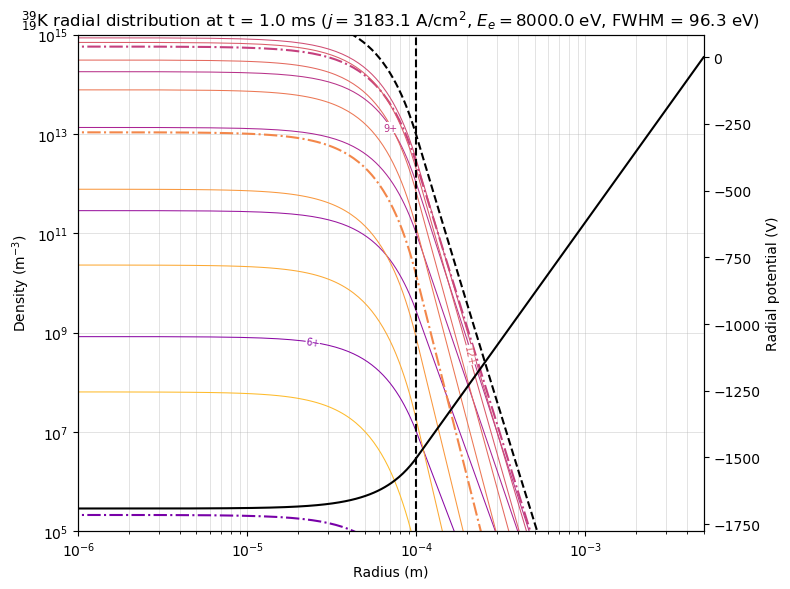

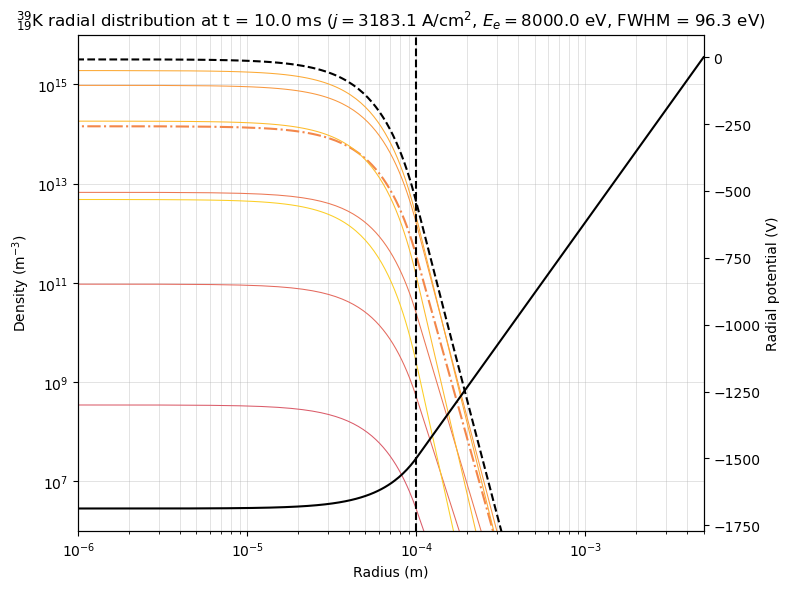

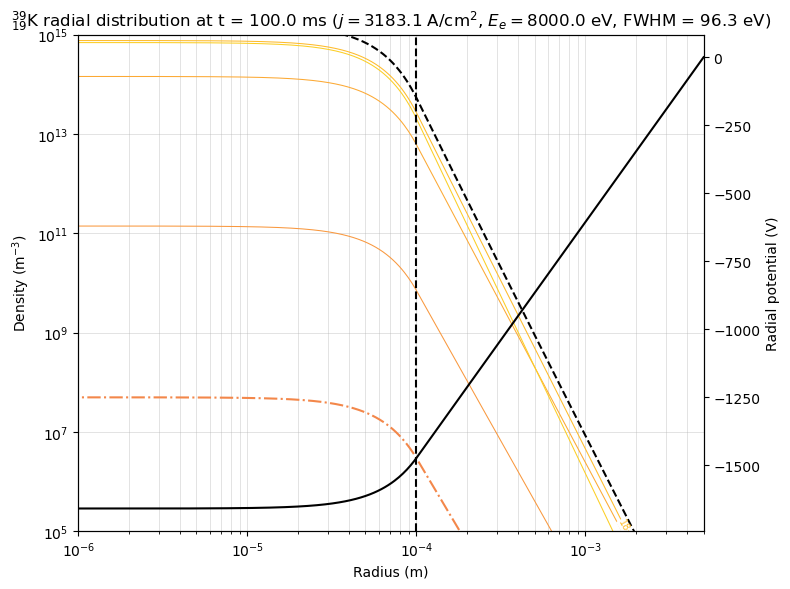

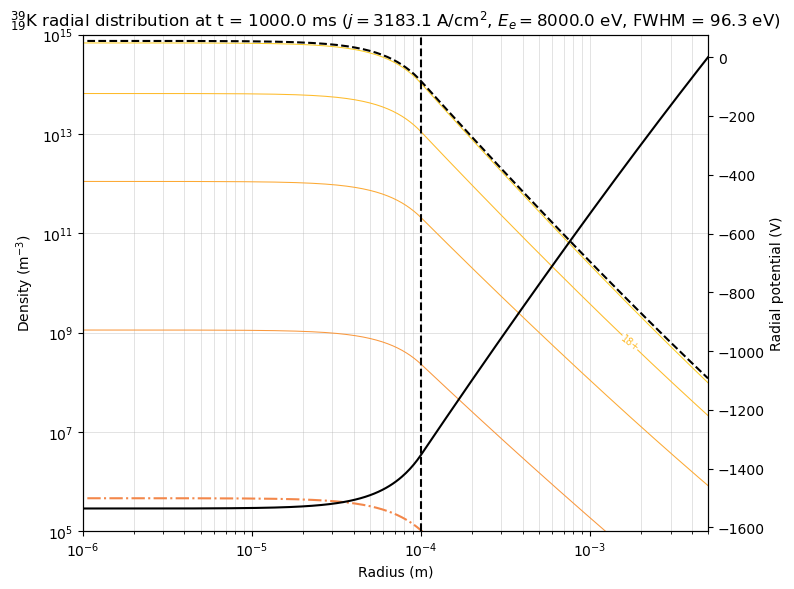

In [12]:
kr.plot_rate(eb.Rate.F_EI)
kr.plot_radial_distribution_at_time(0.001)
kr.plot_radial_distribution_at_time(0.01)
kr.plot_radial_distribution_at_time(0.1)
kr.plot_radial_distribution_at_time(1.0)
kr.plot_radial_distribution_at_time(10.0);


In [ ]:
nr.plot_rate(eb.Rate.F_EI)
# nr.plot_radial_distribution_at_time(0.001)
nr.plot_radial_distribution_at_time(0.01)
nr.plot_radial_distribution_at_time(0.1)
nr.plot_radial_distribution_at_time(1.0)
nr.plot_radial_distribution_at_time(10.0);
